In [14]:
import torch as th
import numpy as np
import matplotlib.pyplot as plt 
from simulator import two_moons

In [47]:
def simulator(theta, n=1):
    a = np.random.uniform(-np.pi / 2, np.pi / 2, size=n)
    r = np.random.normal(loc=.1, scale=.001**2, size=n)
    p = np.array([(r*np.cos(a) + .25), r*np.sin(a)]).T
    theta = np.array([.5, .5])
    x = p + np.array([-np.abs(theta[0] + theta[1]) / np.sqrt(2), np.abs(theta[0] + theta[1]) / np.sqrt(2)])
    return x

In [57]:
np.random.rand(2)

array([0.3127585 , 0.06112844])

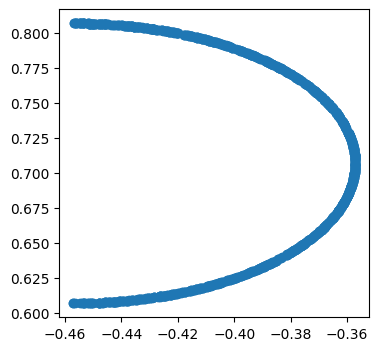

In [74]:
theta = np.random.rand(2) * 2 - 1
x = simulator(theta, n=1000)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[:,0], x[:,1])
#ax.set_xlim((-.5, .5))
#ax.set_ylim((-.5, .5))

In [46]:
np.array([-np.abs(theta[0] + theta[1]) / np.sqrt(2), np.abs(theta[0] + theta[1]) / np.sqrt(2)])

array([-0.70710678,  0.70710678])

In [41]:
p.shape

(100, 2)

(-0.5, 0.5)

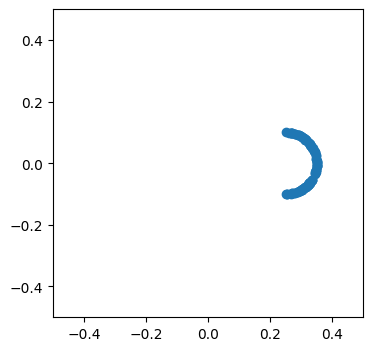

In [40]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(p[:,0], p[:,1])
ax.set_xlim((-.5, .5))
ax.set_ylim((-.5, .5))

In [25]:
n = 100 
a = np.random.uniform(p.pi / 2, np.pi / 2, size=n)
r = np.random.normal(loc=.1, scale=.001**2, size=n)
p = np.array([(r*np.cos(a) + .25), r*np.sin(a)])


SyntaxError: positional argument follows keyword argument (2585248846.py, line 3)

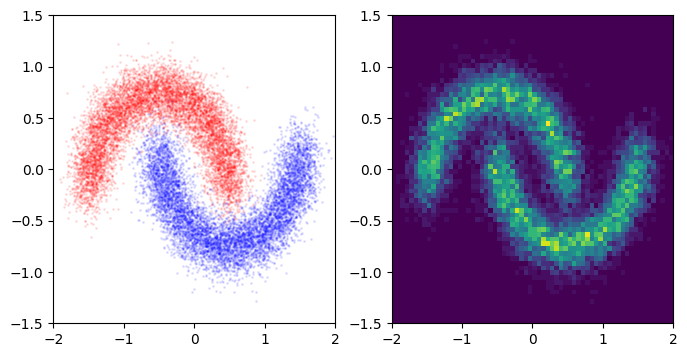

In [9]:

# simulate two moons dataset
x, y = two_moons(16384, .15)

# plot samples
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].scatter(x[y==0][:,0], x[y==0][:,1], color='red', alpha=.1, s=1)
ax[0].scatter(x[y==1][:,0 ], x[y==1][:,1], color='blue', alpha=.1, s=1)

# plot density
xlim, ylim = (-2, 2), (-1.5, 1.5)
ax[1].hist2d(*x.T, bins=64, range=(xlim, ylim))

for i in range(2):
    ax[i].set_xlim(xlim)
    ax[i].set_ylim(ylim)

plt.show()

In [10]:
from sbi.analysis import pairplot
from sbi.inference import NPE, simulate_for_sbi
from sbi.utils import BoxUniform
from sbi.utils.user_input_checks import (
    check_sbi_inputs,
    process_prior,
    process_simulator,
)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [13]:
n_rounds = 2
n_dims = 2
x_o = th.zeros(n_dims)
prior = BoxUniform(low=-2 * th.ones(n_dims), high=2 * th.ones(n_dims))

